In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split as train_test_split
from sklearn.preprocessing import OneHotEncoder as OneHotEncoder

<h1>Reading CSV file and separating X and y</h1>

In [2]:
insu = pd.read_csv('insurance.csv')
X = insu[insu.columns[:-1]].copy()
y = insu[insu.columns[-1]].copy()

<h1>Preproccessing</h1>

Using One Hot Encoding to convert features denoted as strings to numbers

In [3]:
Sex_dict = { "female":0,
             "male":1 }

X["sex_ordinal"] = X.sex.map(Sex_dict)

smoke_ordinal = { "no":0,
             "yes":1 }

X["smoke_ordinal"] = X.smoker.map(smoke_ordinal)

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X[['region']])
x_ohe = enc.transform(X[['region']]).toarray()

new_cols = list(np.unique(X['region']))

for i in range(len(new_cols)):
    X[new_cols[i]] = x_ohe[:,i]  
X.drop(columns = ['sex','smoker','region'],axis=0,inplace=True)
print(X)    

      age     bmi  children  sex_ordinal  smoke_ordinal  northeast  northwest  \
0      19  27.900         0            0              1        0.0        0.0   
1      18  33.770         1            1              0        0.0        0.0   
2      28  33.000         3            1              0        0.0        0.0   
3      33  22.705         0            1              0        0.0        1.0   
4      32  28.880         0            1              0        0.0        1.0   
...   ...     ...       ...          ...            ...        ...        ...   
1333   50  30.970         3            1              0        0.0        1.0   
1334   18  31.920         0            0              0        1.0        0.0   
1335   18  36.850         0            0              0        0.0        0.0   
1336   21  25.800         0            0              0        0.0        0.0   
1337   61  29.070         0            0              1        0.0        1.0   

      southeast  southwest 

<h1>Splitting the dataset</h1>

Splitting the dataset into : Training,Validation and Testing in an 80:10:10 proportion

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.09,random_state=1)

In [5]:
print('Training set shape : ',X_train.shape)
print('Validation set shape : ',X_val.shape)
print('Testing set shape : ',X_test.shape)

Training set shape :  (1095, 9)
Validation set shape :  (109, 9)
Testing set shape :  (134, 9)


<h1>Training the model on the training set </h1>

In [6]:
def init_values():
    gradient = np.ones((X_train.shape[1],1)) 
    b = 1
    alpha = 0.01
    m = X_train.shape[0]
    y_t = np.array(y_train).reshape(m,1)

    
    return gradient,b,alpha,m,y_t

In [7]:
def linearRegressionTraining(epoch,X_train):
    g,b,a,m,y_t = init_values()
    dg = np.zeros((g.shape))
    db = 0
    X = X_train
    jhist = []

    for i in range(epoch):
        h = np.dot(X,g) + b
        j = np.sum(np.power( h-y_t,2 )  ) /(2*m)
        u = np.multiply( h-y_t,X )
        dg = np.array(np.sum(np.multiply( h-y_t,X ) , axis = 0 )/(m)).reshape(g.shape)
        db = np.sum(h-y_t)/(m)
        g= g - (a*dg)/m  
        b = b - (a*db)/m
        
        print('The loss for iteration ',i+1,'is : ',j)
        jhist.append(j)
       
    plt.plot(np.arange(1,epoch+1),jhist)        
    return g,b    

Enter the number of epochs :200
The loss for iteration  1 is :  156545232.85758436
The loss for iteration  2 is :  152164506.54944623
The loss for iteration  3 is :  147990280.19490972
The loss for iteration  4 is :  144012819.34094438
The loss for iteration  5 is :  140222848.41893503
The loss for iteration  6 is :  136611529.11276168
The loss for iteration  7 is :  133170439.74661335
The loss for iteration  8 is :  129891555.64446548
The loss for iteration  9 is :  126767230.41541559
The loss for iteration  10 is :  123790178.12123345
The loss for iteration  11 is :  120953456.28453651
The loss for iteration  12 is :  118250449.69796434
The loss for iteration  13 is :  115674854.99659224
The loss for iteration  14 is :  113220665.95760493
The loss for iteration  15 is :  110882159.49294733
The loss for iteration  16 is :  108653882.30228467
The loss for iteration  17 is :  106530638.15514575
The loss for iteration  18 is :  104507475.77258848
The loss for iteration  19 is :  10257967

The loss for iteration  177 is :  63607394.247238435
The loss for iteration  178 is :  63606331.63167722
The loss for iteration  179 is :  63605311.15199847
The loss for iteration  180 is :  63604330.824690655
The loss for iteration  181 is :  63603388.75974096
The loss for iteration  182 is :  63602483.15622784
The loss for iteration  183 is :  63601612.29812121
The loss for iteration  184 is :  63600774.55028056
The loss for iteration  185 is :  63599968.35464207
The loss for iteration  186 is :  63599192.22658488
The loss for iteration  187 is :  63598444.751469165
The loss for iteration  188 is :  63597724.581337236
The loss for iteration  189 is :  63597030.43177
The loss for iteration  190 is :  63596361.078891896
The loss for iteration  191 is :  63595715.35651674
The loss for iteration  192 is :  63595092.15342834
The loss for iteration  193 is :  63594490.41078911
The loss for iteration  194 is :  63593909.11967102
The loss for iteration  195 is :  63593347.31870285
The loss f

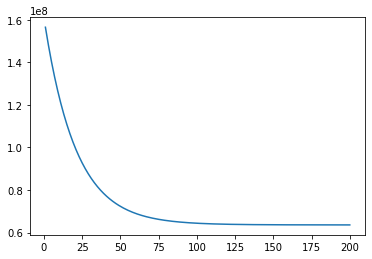

In [8]:
epochs = int(input('Enter the number of epochs :'))
G,B = linearRegressionTraining(epochs,X_train)

In [9]:
h_val = np.dot(X_val,G) + B

In [10]:
Y = np.array(y_val).reshape(y_val.shape[0],1)
mse = np.mean(np.power(h_val-Y,2))/2
print(mse)

67862787.37128407


In [11]:
percentage_error = 100 * np.divide(h_val-Y,Y) 
comp = np.concatenate((h_val,Y,percentage_error), axis = 1)
print(comp)

[[ 1.54010409e+04  1.04229166e+04  4.77613356e+01]
 [ 1.69716821e+04  1.17358790e+04  4.46136415e+01]
 [ 1.36245027e+04  6.57154400e+03  1.07325748e+02]
 [ 1.54937671e+04  7.65077375e+03  1.02512421e+02]
 [ 1.42992856e+04  8.23309750e+03  7.36805083e+01]
 [ 1.49461466e+04  1.10137119e+04  3.57048989e+01]
 [ 1.50511620e+04  8.70345600e+03  7.29331660e+01]
 [ 1.33267359e+04  4.01822460e+04 -6.68342683e+01]
 [ 7.26276952e+03  1.24226000e+03  4.84641663e+02]
 [ 1.37513536e+04  4.00033322e+04 -6.56244798e+01]
 [ 9.76609764e+03  4.71973655e+03  1.06920398e+02]
 [ 7.58229224e+03  1.70562450e+03  3.44546396e+02]
 [ 1.60592878e+04  1.12993430e+04  4.21258549e+01]
 [ 1.16178696e+04  3.61976990e+04 -6.79043975e+01]
 [ 1.39018563e+04  2.62365800e+04 -4.70134587e+01]
 [ 1.54938042e+04  6.35627070e+03  1.43756204e+02]
 [ 1.39709793e+04  6.07967150e+03  1.29798260e+02]
 [ 1.31538854e+04  5.98952365e+03  1.19614884e+02]
 [ 1.00553290e+04  3.16145400e+03  2.18060267e+02]
 [ 1.41472350e+04  8.21920390e+